# BAN 530 Capstone
## UNC-W Summer 2021
### Miguel Fernandez

## Bengaluru Restaurants Exploratory Data Analysis

The final project hopes to identify variables that impact a restaurant's rating. The analysis only focuses on those restauarants which are `Casual Dining` and `Quick Bites` because the data set is so large and there are several categories with very few observations. These two types of restaurants account for more than 50% of the original data set. Those restaurants that do not have a rating have also been removed because they will not offer any insight into the model. 

Several binary variables were created to prepare the data for modeling. For example, the options to order online or reserve a table were converted to binary values, with a value of 1 indicating 'Yes'. A binary variable indicating whether a restaurant is a `Casual Dining` establishment has also been constructed. Preliminary analysis showed that the median number of restaurants in each neighborhood was 167. Those neighborhoods with at least 167 restaurants have been retained for the analysis and all others have been removed. This was done with the goal of improving model accuracy by removing noise from the data and allowing the model to focus on trends. A binary variable for each neighborhood was created during pre-processing.

Finally, several pre-processing steps were employed on the `cuisines` attribute. The top 30 individual cuisines were identified and a binary variable was created for each one. If a restaurant served a cuisine that was not found in the top 30, it was recorded in a binary variable for other cuisines. 

The original data for this analysis can be found [here](https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants). The pre-processing script can be found [here](https://github.com/miguelf88/BAN530/blob/main/pre-processing.py). 

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.max_columns = 999

In [2]:
# read in the data
df = pd.read_csv('processed_data.csv')

In [3]:
df.shape

(21246, 84)

We can see the data set is 21,246 observations with 84 columns. Let's see what they are.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21246 entries, 0 to 21245
Data columns (total 84 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      21246 non-null  object 
 1   name                         21246 non-null  object 
 2   votes                        21246 non-null  int64  
 3   location                     21246 non-null  object 
 4   dish_liked                   11645 non-null  object 
 5   cuisines                     21246 non-null  object 
 6   approx_cost(for_two_people)  21164 non-null  float64
 7   final_rating                 21246 non-null  float64
 8   chain                        21246 non-null  int64  
 9   online_order_bin             21246 non-null  int64  
 10  book_table_bin               21246 non-null  int64  
 11  casual_dining_bin            21246 non-null  int64  
 12  btm_bin                      21246 non-null  int64  
 13  hsr_bin         

The attributes ending with `_bin` are the binary variables that were created during pre-processing.

In [5]:
df.head(2)

,address,name,votes,location,dish_liked,cuisines,approx_cost(for_two_people),final_rating,chain,online_order_bin,book_table_bin,casual_dining_bin,btm_bin,hsr_bin,jayanagar_bin,koramangala_5th_block_bin,jp_nagar_bin,marathahalli_bin,whitefield_bin,indiranagar_bin,bannerghatta_road_bin,bellandur_bin,koramangala_6th_block_bin,electronic_city_bin,brigade_road_bin,koramangala_7th_block_bin,koramangala_1st_block_bin,ulsoor_bin,sarjapur_road_bin,banashankari_bin,basavanagudi_bin,kalyan_nagar_bin,richmond_road_bin,frazer_town_bin,brookefield_bin,rajajinagar_bin,kammanahalli_bin,banaswadi_bin,malleshwaram_bin,new_bel_road_bin,koramangala_4th_block_bin,cunningham_road_bin,mg_road_bin,shanti_nagar_bin,church_street_bin,residency_road_bin,ejipura_bin,shivajinagar_bin,domlur_bin,jeevan_bhima_nagar_bin,old_airport_road_bin,st._marks_road_bin,cuisines_lst,north_indian_bin,chinese_bin,south_indian_bin,biryani_bin,fast_food_bin,street_food_bin,seafood_bin,continental_bin,andhra_bin,beverages_bin,mughlai_bin,kerala_bin,italian_bin,rolls_bin,momos_bin,arabian_bin,pizza_bin,burger_bin,kebab_bin,thai_bin,mangalorean_bin,asian_bin,desserts_bin,salad_bin,juices_bin,bengali_bin,bbq_bin,american_bin,healthy_food_bin,sandwich_bin,other_bin
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,775,Banashankari,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,4.1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"['North Indian', 'Mughlai', 'Chinese']",1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,787,Banashankari,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,4.1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"['Chinese', 'North Indian', 'Thai']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Now that we've seen what the data looks like, let's start to explore it.

Ultimately, we are interested in what attributes influence a restaurant's final rating. Let's take a look at `final_rating`.

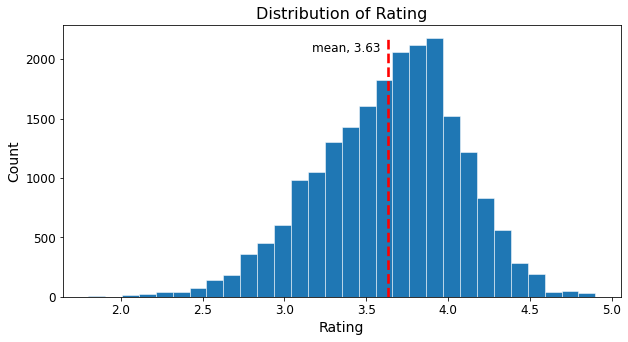

In [6]:
mean = round(df['final_rating'].mean(), 2)

plt.figure(figsize=(10, 5))
ax = df['final_rating'].plot(kind='hist', bins=30, edgecolor='w', linewidth=0.5)
plt.axvline(mean, 0, 0.95, color='r', ls='--', lw=2.6)
plt.text(3.17, 2060, 'mean, ' + str(mean), size='large')
plt.title('Distribution of Rating', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Count', fontsize=14)
plt.yticks(fontsize=12)
plt.show()

The histogram above shows the distribution of restaurant's final rating. We can see there are very few observations that have a perfect 5.0 and very few that scored less than a 2.0. The red dashed line represents the average rating for all restaurants in the analysis. The distribution is approximately normal. It does have a slight left skew with a fairly sharp decline in restaurants with a 4.0 rating or higher.

Let's take a look at how price and restaurant type influence a restaurant's rating.

<Figure size 1080x720 with 0 Axes>

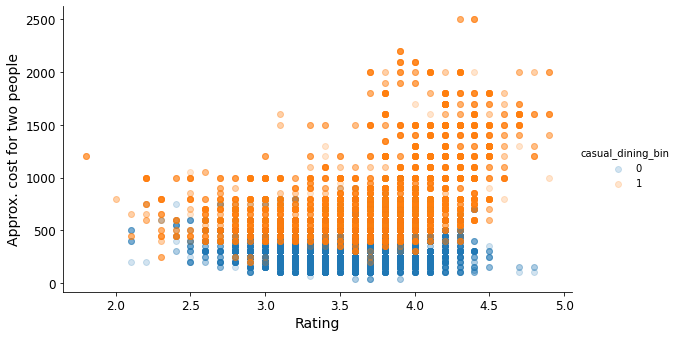

In [36]:
plt.figure(figsize=(15,10))
ax = sns.lmplot(
    x='final_rating',
    y='approx_cost(for_two_people)',
    data=df,
    hue='casual_dining_bin',
    fit_reg=False,
    height=4.5,
    aspect=1.75,
    scatter_kws={'alpha':0.2}
)

plt.xlabel('Rating', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Approx. cost for two people', fontsize=14)
plt.yticks(fontsize=12)

sns.despine()
plt.show()

A restaurant's rating is along the x-axis in the plot above while the approximate cost for two people is along the y-axis. We can see that while a restaurant's rating is around 3.0 or less, dinner will cost less than 1,000 for two people. However, once a restaurant's rating climbs above 3.75, we can see that prices dramatically increase. There are still plenty of restaurants with very high ratings that are still affordable, but most of the more expensive restaurants are highly rated.

The orange points represent restaurants that are casual dining while the blue points are fast food joints. We can see that fast food costs about the same regardless of rating. We can also see that casual dining establishments cost about the same when their rating is less than 3.75 but once a rating is higher than that, the cost rises sharply. 

There also appear to be a few outliers in the fast food category with ratings around 4.75. There are a handful of restaurants in the data set with a rating lower than 2 which happens to be casual dining.

Let's take a look at those extreme observations.

In [31]:
cond1 = df['final_rating'] < 2
cond2 = (df['casual_dining_bin'] == 0) & (df['final_rating'] > 4.5)

df[cond1 | cond2].groupby('name').agg({
    'location': 'first',
    'cuisines': 'first',
    'casual_dining_bin': 'max',
    'approx_cost(for_two_people)': 'max',
    'votes': 'max',
    'final_rating': 'max'
})

,location,cuisines,casual_dining_bin,approx_cost(for_two_people),votes,final_rating
name,,,,,,
Alibi - Maya International Hotel,Church Street,"North Indian, Continental, Chinese",1,1200.0,225,1.8
Brahmin's Coffee Bar,Basavanagudi,South Indian,0,100.0,2679,4.8
CTR,Malleshwaram,South Indian,0,150.0,4421,4.8
Taaza Thindi,Banashankari,South Indian,0,100.0,651,4.7


We can see that there are four restaurants that are outliers. There is just one location with a rating of 1.8 and it is casual dining. It's interesting that this restaurant, Maya International Hotel, is the most expensive, in terms of the outliers, but has the lowest rating. The hotel has the fewest votes, only 225. It also serves North Indian cuisines while the other three outliers serve South Indian. They are also much cheaper because they are fast food locations. The three locations appear to be quite popular given the much larger number of votes. 

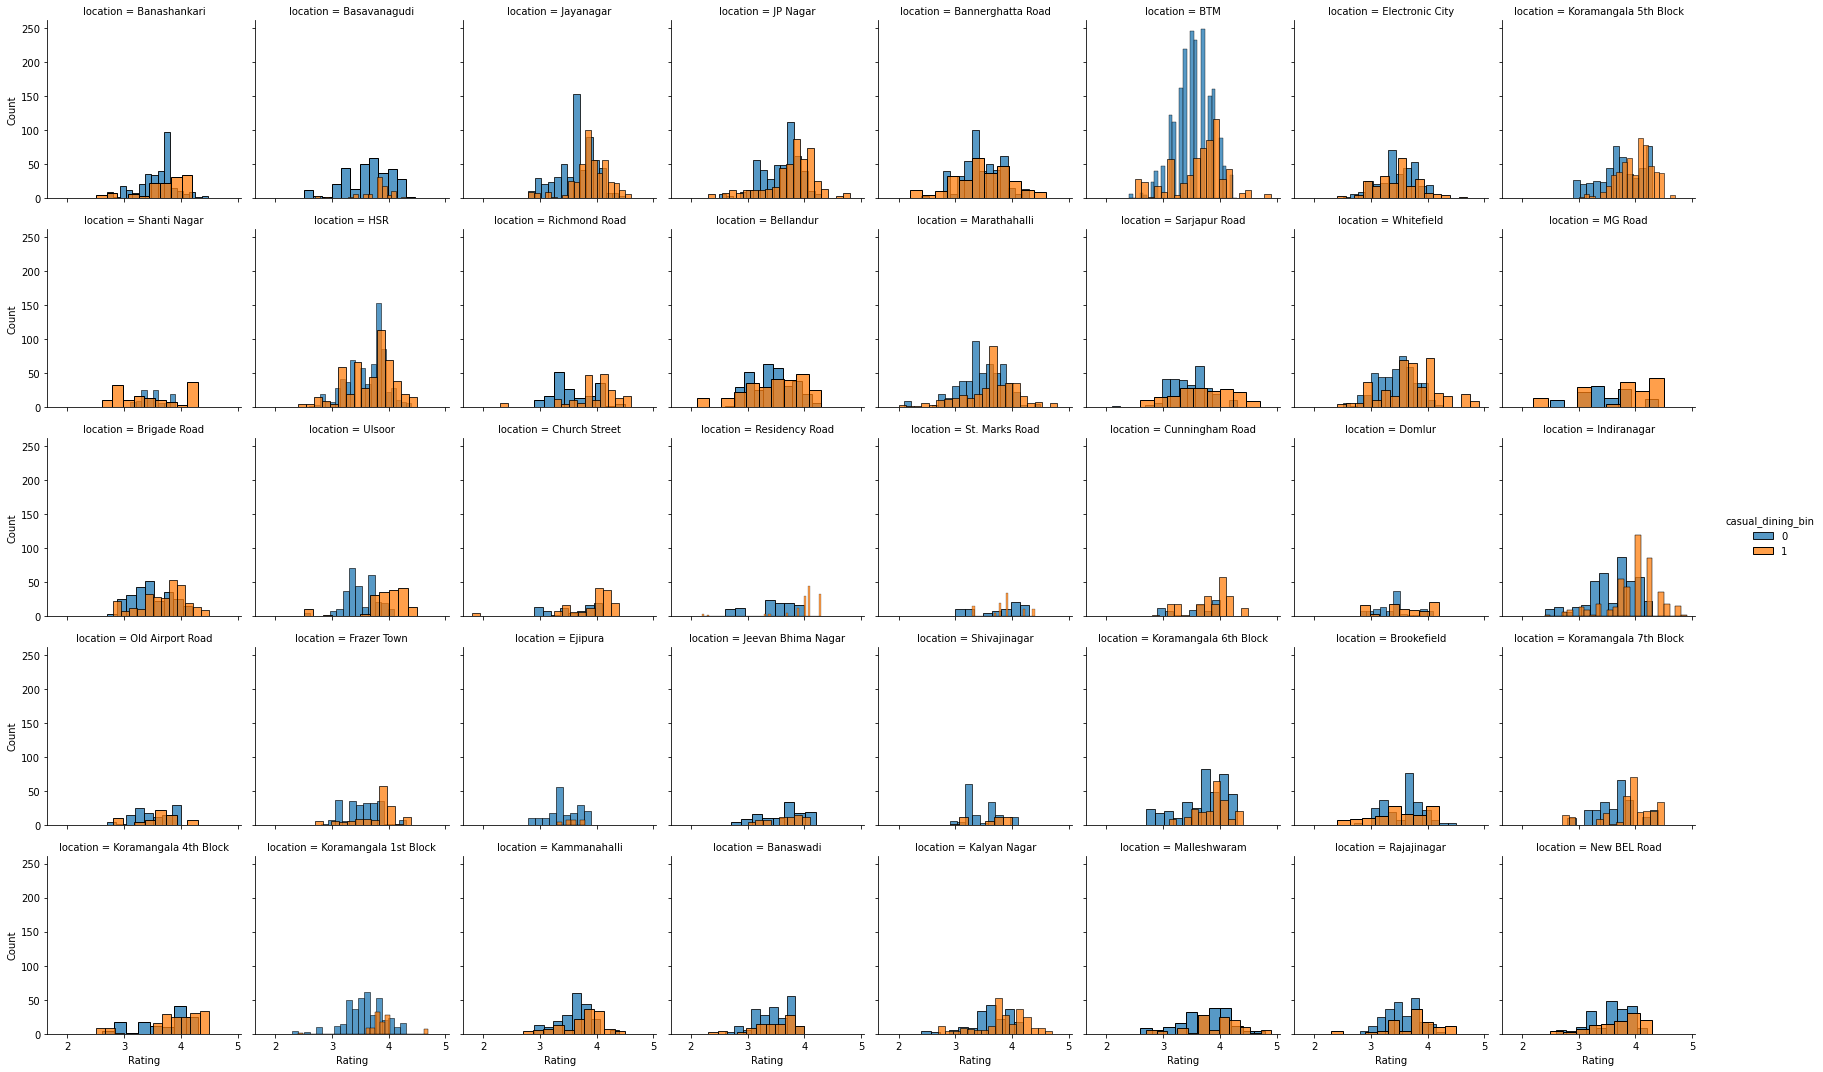

In [43]:
g = sns.FacetGrid(df, col="location", hue="casual_dining_bin", col_wrap=8)
g.map_dataframe(sns.histplot, x="final_rating")
g.set_axis_labels("Rating", "Count")
g.add_legend()
g.tight_layout()

The facet grid above contains a plot for each neighborhood in the data. Just as above, those values in orange are casual dining and those in blue are fast food. The BTM neighborhood appears to be a popular spot for fast food. In fact, most neighborhoods in the analysis contain more fast food. The few exceptions to this are Cunningham Road and Indiranagar. We can also see a fairly even distribution of locations where fast food is highly rated compared to casual dining and vice-versa. 

Let's take a look at some of the other binary variables in the data set and see how they relate to a restaurant's rating.
- Chain restaurant
* Online ordering
+ Reserve a table

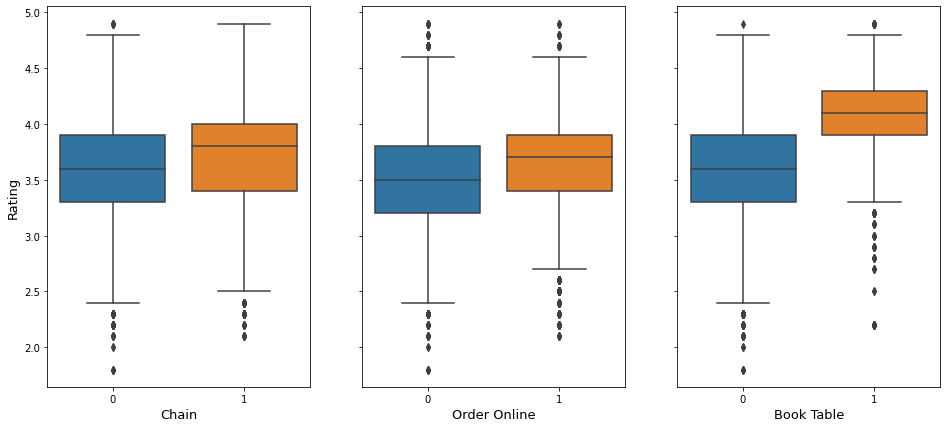

In [67]:
# create subplots for binary variables and final rating
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(16,7))

sns.boxplot(x="chain", y="final_rating", data=df, ax=axes[0])
sns.boxplot(x="online_order_bin", y="final_rating", data=df, ax=axes[1])
sns.boxplot(x="book_table_bin", y="final_rating", data=df, ax=axes[2])

axes[0].set_xlabel('Chain', fontsize=13)
axes[1].set_xlabel('Order Online', fontsize=13)
axes[2].set_xlabel('Book Table', fontsize=13)

axes[0].set_ylabel('Rating', fontsize=13)
axes[1].set_ylabel('')
axes[2].set_ylabel('')

plt.show()

There appears to be a similar distribution between the chain attribute and order online attribute. What is interesting is the ratings for those restaurants where you can reserve a table. They tend to be much more highly reviewed. This attribute might be an important one during the predictive modeling.